# Stock Trading

The cell below defines the **abstract class** whose API you need to implement. **Do NOT modify it** - use the dedicated cell further below for your implementation instead.

In [1]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  
      

# abstract class to represent a stock trading platform
class AbstractStockTradingPlatform(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # adds transactionRecord to the set of completed transactions
    @abstractmethod
    def logTransaction(self, transactionRecord):
        pass

    # returns a list with all transactions of a given stockName,
    # sorted by increasing trade value. 
    # stockName : str
    @abstractmethod
    def sortedTransactions(self, stockName): 
        sortedList = []
        return sortedList
    
    # returns a list of transactions of a given stockName with minimum trade value
    # stockName : str
    @abstractmethod
    def minTransactions(self, stockName): 
        minList = []
        return minList    
    
    # returns a list of transactions of a given stockName with maximum trade value
    # stockName : str
    @abstractmethod
    def maxTransactions(self, stockName): 
        maxList = []
        return maxList    

    # returns a list of transactions of a given stockName, 
    # with the largest trade value below a given thresholdValue.  
    # stockName : str
    # thresholdValue : double
    @abstractmethod
    def floorTransactions(self, stockName, thresholdValue): 
        floorList = []
        return floorList    

    # returns a list of transactions of a given stockName, 
    # with the smallest trade value above a given thresholdValue.  
    # stockName : str
    # thresholdValue : double
    @abstractmethod
    def ceilingTransactions(self, stockName, thresholdValue): 
        ceilingList = []
        return ceilingList    

        
    # returns a list of transactions of a given stockName,  
    # whose trade value is within the range [fromValue, toValue].
    # stockName : str
    # fromValue : double
    # toValue : double
    @abstractmethod
    def rangeTransactions(self, stockName, fromValue, toValue): 
        rangeList = []
        return rangeList    

Use the cell below to define any data structure and auxiliary python function you may need. Leave the implementation of the main API to the next code cell instead.

In [2]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE
BLACK = False
RED = True

# A LLRB Tree data structure

class Tree():
  def __init__(self, key, transactionRecord):
    self.root = Node(key, transactionRecord)
    self.min = self.root
    self.max = self.root
  def insert(self, key, transactionRecord):
    self.root = self.root.insert(key, transactionRecord)
    if key < self.min.key:
      self.min = self.root.findMin()
    elif key > self.max.key:
      self.max = self.root.findMax()
  def sorted(self):
    return self.root.sorted()
  def floor(self, thresholdValue):
    return self.root.floor(thresholdValue)
  def ceiling(self, thresholdValue):
    return self.root.ceiling(thresholdValue)
  def range(self, fromValue, toValue):
    return self.root.range(fromValue, toValue)
  def min(self):
    return self.min.info
  def max(self):
    return self.max.info

class Node():
  def __init__(self, key, transactionRecord):
    self.color = RED
    self.key = key
    self.info = [transactionRecord]
    self.right = None
    self.left = None

  # changes the orientation of a right-leaning link so to lean left
  def rotateLeft(self):
    x = self.right 
    self.right = x.left  
    x.left = self
    x.color = self.color
    self.color = RED
    return x
  
  # changes the orientation of a left-leaning link so to lean right
  def rotateRight(self):
    x = self.left
    self.left = x.right
    x.right = self
    x.color = self.color
    self.color = RED
    return x

  # swaps the colour of the parent node
  # sets the child nodes' colour to black
  def flipColors(self):
    self.color = not self.color
    self.left.color = BLACK
    self.right.color = BLACK

  def insert(self, key, transactionRecord):

    root = self
    isRed = lambda x : x is not None and x.color

    if isRed(root.left) and isRed(root.right):
      root.flipColors()

    if root.key==key:
      root.info.append(transactionRecord)
    elif key<root.key:
      if root.left is not None:
        root.left = root.left.insert(key, transactionRecord)
      else:
        root.left = Node(key, transactionRecord)
    else:
      if root.right is not None:
        root.right = root.right.insert(key, transactionRecord)
      else:
        root.right = Node(key, transactionRecord)

    
    if isRed(root.right) and not isRed(root.left):
      root = root.rotateLeft()
    if isRed(root.left) and isRed(root.left.left):
      root = root.rotateRight() 

    return root

  # sorts by trade value
  def sorted(self):
    orderedList = []
    self.sortedHelper(orderedList)
    return orderedList

  def sortedHelper(self,orderedList):
    if self.left is not None:
      self.left.sortedHelper(orderedList)
    orderedList.extend(self.info)
    if self.right is not None:
     self.right.sortedHelper(orderedList)
    
  # traverses to the left-most node 
  def findMin(self):
    if self.left is not None:
      return self.left.findMin()
    return self

  # traverses to the left-most node 
  def findMax(self):
    if self.right is not None:
      return self.right.findMax()
    return self

  def floorHelper(self, thresholdValue):
      if self is None: 
        return None
      if thresholdValue == self.key: 
        return self
      if thresholdValue > self.key: 
        floorNode = Node.floorHelper(self.right, thresholdValue)
        return floorNode if floorNode is not None else self

      return Node.floorHelper(self.left, thresholdValue)

  # outputs the node with the largest trade value less
  # than or equal to the key value
  def floor(self, thresholdValue):
    floorNode = self.floorHelper(thresholdValue)

    if floorNode is not None:
      return floorNode.info
        
    return []

  def ceilingHelper(self, thresholdValue):
      if self is None: 
        return None
      if thresholdValue == self.key: 
        return self
      if thresholdValue < self.key: 
        ceilingNode = Node.ceilingHelper(self.left, thresholdValue)
        return ceilingNode if ceilingNode is not None else self

      return Node.ceilingHelper(self.right, thresholdValue)

  # outputs the node with the smallest trade value greater
  # than or equal to the key value
  def ceiling(self, thresholdValue):
    ceilingNode = self.ceilingHelper(thresholdValue)

    if ceilingNode is not None:
      return ceilingNode.info
        
    return []

  def rangeHelper(self, fromValue, toValue, rangeList):
      if self is not None:
        if fromValue < self.key :
          Node.rangeHelper(self.left, fromValue, toValue, rangeList)
  
        if fromValue <= self.key and toValue >= self.key:
          rangeList.extend(self.info)
  
        Node.rangeHelper(self.right, fromValue, toValue, rangeList)

  def range(self, fromValue, toValue):
    rangeList = []
    self.rangeHelper(fromValue, toValue, rangeList)
    return rangeList


Use the cell below to implement the requested API. 

In [3]:
# IMPLEMENT HERE THE REQUESTED API

class StockTradingPlatform(AbstractStockTradingPlatform):
    
    def __init__(self):
        self.stocks = dict()          
        

    def logTransaction(self, transactionRecord):

        # match name and insert record to tree
        key = transactionRecord[1]*transactionRecord[2]
        stockName = transactionRecord[0]
        if(stockName in self.stocks):
          root = self.stocks[stockName]
          root = root.insert(key, transactionRecord)
        else:
          root = Tree(transactionRecord[1]*transactionRecord[2], transactionRecord)
          self.stocks[stockName] = root


    def sortedTransactions(self, stockName): 
        if stockName in self.stocks:
          return self.stocks[stockName].sorted();  
        return []
    
    def minTransactions(self, stockName): 
        if stockName in self.stocks:
          return self.stocks[stockName].min.info;
        return []
    
    def maxTransactions(self, stockName): 
        if stockName in self.stocks:
          return self.stocks[stockName].max.info;
        return []

    def floorTransactions(self, stockName, thresholdValue): 
        if stockName in self.stocks:
          return self.stocks[stockName].floor(thresholdValue);
          
        return []

    def ceilingTransactions(self, stockName, thresholdValue): 
        if stockName in self.stocks:
          return self.stocks[stockName].ceiling(thresholdValue);
          
        return []   

    def rangeTransactions(self, stockName, fromValue, toValue): 
        if stockName in self.stocks:
          return self.stocks[stockName].range(fromValue, toValue);        
        return []

    def getStocks(self):
      return self.stocks.keys()



The cell below provides helper code that you can use within your experimental framework to generate random transaction data. **Do NOT modify it**.

In [4]:
# DO NOT MODIFY THIS CELL

import random
from datetime import timedelta
from datetime import datetime

class TransactionDataGenerator:
    def __init__(self):
        self.stockNames = ["Barclays", "HSBA", "Lloyds Banking Group", "NatWest Group", 
                      "Standard Chartered", "3i", "Abrdn", "Hargreaves Lansdown", 
                      "London Stock Exchange Group", "Pershing Square Holdings", 
                      "Schroders", "St. James's Place plc."]
        self.minTradeValue = 500.00
        self.maxTradeValue = 100000.00
        self.startDate = datetime.strptime('1/1/2022 1:00:00', '%d/%m/%Y %H:%M:%S')
        random.seed(20221603)
          
    # returns the name of a traded stock at random
    def getStockName(self):
        return random.choice(self.stockNames)

    # returns the trade value of a transaction at random
    def getTradeValue(self):
        return round(random.uniform(self.minTradeValue, self.maxTradeValue), 2)
    
    # returns a list of N randomly generated transactions,
    # where each transaction is represented as a list [stock name, price, quantity, timestamp]
    # N : int
    def generateTransactionData(self, N):   
        listTransactions = [[]]*N
        listDates = [self.startDate + timedelta(seconds=3*x) for x in range(0, N)]
        listDatesFormatted = [x.strftime('%d/%m/%Y %H:%M:%S') for x in listDates]
        for i in range(N):
            stockName = random.choice(self.stockNames)
            price = round(random.uniform(50.00, 100.00), 2)
            quantity = random.randint(10,1000)
            listTransactions[i] = [stockName, price, quantity, listDatesFormatted[i]]   
        return listTransactions

Use the cell below for the python code needed to realise your **experimental framework** (i.e., to generate test data, to instante the `StockTrading` class, to thorouhgly experiment with its API functions, and to experimentally measure their performance). You may use the previously provided ``TransactionDataGenerator`` class to generate random transaction data.

In [5]:
import random
import timeit

# ADD YOUR EXPERIMENTAL FRAMEWORK CODE HERE

# This block runs timing for each operation
# and stores timing data in arrays for ploting


# A helper class to calculate the mean
class NMean():
  def __init__(self, ic):
    self.items=[0]*ic
    self.ic=ic
    self.ind=0
  def getMean(self):
    return sorted(self.items)[self.ic//2]
  def add(self, item):
    self.items[self.ind]=item
    self.ind = self.ind+1 if self.ind+1 < self.ic else 0

def avg(arr):
  return sum(arr)/len(arr)

nrOfTransactions = 100000
step = 1000
transactionNumbers = []
testDataGen = TransactionDataGenerator()

print("T numbers: ", nrOfTransactions)

# run each operation in the sortedd case
# all the values in order (sorted Case for RB Tree) and of the same stock
nmean = NMean(step)
sortedCaseTestPlatform = StockTradingPlatform()

sortedCaseTimes = []
sortedCaseSortedTimes = []
sortedCaseMinTimes = []
sortedCaseMaxTimes = []
sortedCaseFloorTimes = []
sortedCaseCeilingTimes = []
sortedCaseRangeTimes = []

for i in range(nrOfTransactions):
  startTime = timeit.default_timer()
  sortedCaseTestPlatform.logTransaction(["sorted Inc.",-i,i,""])
  nmean.add(timeit.default_timer()-startTime)

  if (i+1)%step == 0:
    # insertion time
    sortedCaseTimes.append(nmean.getMean()*step+(sortedCaseTimes[-1] if i>=step else 0))

    # max time
    sortedCaseMaxTimes.append(timeit.timeit("sortedCaseTestPlatform.maxTransactions(\"sorted Inc.\")", "from __main__ import sortedCaseTestPlatform", number = 100))


    # min time
    sortedCaseMinTimes.append(timeit.timeit("sortedCaseTestPlatform.minTransactions(\"sorted Inc.\")", "from __main__ import sortedCaseTestPlatform", number = 100))


    # floor time
    sortedCaseFloorTimes.append(timeit.timeit("sortedCaseTestPlatform.floorTransactions(\"sorted Inc.\", testDataGen.getTradeValue())", "from __main__ import sortedCaseTestPlatform, testDataGen", number = 100))


    # ceiling time
    sortedCaseCeilingTimes.append(timeit.timeit("sortedCaseTestPlatform.ceilingTransactions(\"sorted Inc.\", testDataGen.getTradeValue())", "from __main__ import sortedCaseTestPlatform, testDataGen", number = 100))


    # sorted time
    startTime = timeit.default_timer()
    output = sortedCaseTestPlatform.sortedTransactions("sorted Inc.")
    sortedCaseSortedTimes.append(timeit.default_timer()-startTime)

    # range time
    startTime = timeit.default_timer()
    output = sortedCaseTestPlatform.rangeTransactions("sorted Inc.", -(i*i), 0)
    sortedCaseRangeTimes.append(timeit.default_timer()-startTime)


print("sorted case timing for insertion: ", sortedCaseTimes[-1])
print("sorted case timing for sorted: ", avg(sortedCaseSortedTimes))
print("sorted case timing for min: ", avg(sortedCaseMinTimes))
print("sorted case timing for max: ", avg(sortedCaseMaxTimes))
print("sorted case timing for floor: ", avg(sortedCaseFloorTimes))
print("sorted case timing for ceiling: ", avg(sortedCaseCeilingTimes))
print("sorted case timing for range: ", avg(sortedCaseRangeTimes))

# run each operation in the avg case
# random data
avgCaseTestPlatform = StockTradingPlatform()
testData = testDataGen.generateTransactionData(nrOfTransactions)

avgCaseTimes = []
avgCaseSortedTimes = []
avgCaseMinTimes = []
avgCaseMaxTimes = []
avgCaseFloorTimes = []
avgCaseCeilingTimes = []
avgCaseRangeTimes = []

for i in range(nrOfTransactions):
  startTime = timeit.default_timer()
  avgCaseTestPlatform.logTransaction(testData[i])
  nmean.add(timeit.default_timer()-startTime)

  if (i+1)%step == 0:
    
    # insertion time
    transactionNumbers.append(i+1)
    avgCaseTimes.append(nmean.getMean()*step+(avgCaseTimes[-1] if i>=step else 0))

    # max time
    stockName = testDataGen.getStockName()
    avgCaseMaxTimes.append(timeit.timeit("avgCaseTestPlatform.maxTransactions(stockName)", "from __main__ import avgCaseTestPlatform, stockName", number = 100))

    # min time
    stockName = testDataGen.getStockName()
    avgCaseMinTimes.append(timeit.timeit("avgCaseTestPlatform.minTransactions(stockName)", "from __main__ import avgCaseTestPlatform, stockName", number = 100))


    # floor time
    stockName = testDataGen.getStockName()
    tradeValue = testDataGen.getTradeValue()
    avgCaseFloorTimes.append(timeit.timeit("avgCaseTestPlatform.floorTransactions(stockName, tradeValue)", "from __main__ import avgCaseTestPlatform, stockName, tradeValue", number = 100))

    # ceiling time
    stockName = testDataGen.getStockName()
    tradeValue = testDataGen.getTradeValue()
    avgCaseCeilingTimes.append(timeit.timeit("avgCaseTestPlatform.ceilingTransactions(stockName, tradeValue)", "from __main__ import avgCaseTestPlatform, stockName, tradeValue", number = 100))


    # sorted time
    startTime = timeit.default_timer()
    output = avgCaseTestPlatform.sortedTransactions(testDataGen.getStockName())
    avgCaseSortedTimes.append(timeit.default_timer()-startTime)

    # range time
    a = testDataGen.getTradeValue()
    b = testDataGen.getTradeValue()
    if a > b:
      temp = b
      b = a
      a = b
    startTime = timeit.default_timer()
    output = avgCaseTestPlatform.rangeTransactions(testDataGen.getStockName(), a, b)
    avgCaseRangeTimes.append(timeit.default_timer()-startTime)

print("Average case timing for insertion: ", avgCaseTimes[-1])
print("Average case timing for sorted: ", avg(avgCaseSortedTimes))
print("Average case timing for min: ", avg(avgCaseMinTimes))
print("Average case timing for max: ", avg(avgCaseMaxTimes))
print("Average case timing for floor: ", avg(avgCaseFloorTimes))
print("Average case timing for ceiling: ", avg(avgCaseCeilingTimes))
print("Average case timing for range: ", avg(avgCaseRangeTimes))

print("The timings are stored in lists for plotting.")
  

T numbers:  100000
sorted case timing for insertion:  1.0912806610576808
sorted case timing for sorted:  0.0062300804030383005
sorted case timing for min:  1.2007929035462439e-05
sorted case timing for max:  1.3005911605432629e-05
sorted case timing for floor:  0.00025781045318581166
sorted case timing for ceiling:  0.00023117789125535638
sorted case timing for range:  0.011608566753566266
Average case timing for insertion:  0.6620031781494617
Average case timing for sorted:  0.0013675645727198571
Average case timing for min:  1.0935881873592734e-05
Average case timing for max:  1.169538008980453e-05
Average case timing for floor:  0.00016566375095862894
Average case timing for ceiling:  0.00016553548979572952
Average case timing for range:  0.0005869262898340822
The timings are stored in lists for plotting.


The cell below exemplifies **debug** code I will invoke on your submission - it does not represent an experimental framework (which should me much more comprehensive). **Do NOT modify it**. 

In [6]:
# DO NOT MODIFY THIS CELL

import timeit

testPlatform = StockTradingPlatform()
testDataGen = TransactionDataGenerator()

numTransactions = 1000000
testData = testDataGen.generateTransactionData(numTransactions)

numRuns = 100

print("Examples of transactions:", testData[0], testData[numTransactions//2], testData[numTransactions-1])

#
# testing the logTransaction() API 
#
starttime = timeit.default_timer()
for i in range(numTransactions):
    testPlatform.logTransaction(testData[i])
endtime = timeit.default_timer()
print("\nExecution time to load", numTransactions, "transactions:", round(endtime-starttime,4))

#
# testing the various API functions
#
starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.sortedTransactions(testDataGen.getStockName())
endtime = timeit.default_timer()
print("\nMean execution time sortedTransactions:", round((endtime-starttime)/numRuns,4))

starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.minTransactions(testDataGen.getStockName())
endtime = timeit.default_timer()
print("\nMean execution time minTransactions:", round((endtime-starttime)/numRuns,4))

starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.maxTransactions(testDataGen.getStockName())
endtime = timeit.default_timer()
print("\nMean execution time maxTransactions:", round((endtime-starttime)/numRuns,4))


starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.floorTransactions(testDataGen.getStockName(), testDataGen.getTradeValue())
endtime = timeit.default_timer()
print("\nMean execution time floorTransactions:", round((endtime-starttime)/numRuns,4))


starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.ceilingTransactions(testDataGen.getStockName(), testDataGen.getTradeValue())
endtime = timeit.default_timer()
print("\nMean execution time ceilingTransactions:", round((endtime-starttime)/numRuns,4))


starttime = timeit.default_timer()
for i in range(numRuns):
    rangeValues = sorted([testDataGen.getTradeValue(), testDataGen.getTradeValue()])
    output = testPlatform.rangeTransactions(testDataGen.getStockName(), rangeValues[0], rangeValues[1])
endtime = timeit.default_timer()
print("\nMean execution time rangeTransactions:", round((endtime-starttime)/numRuns,4))

Examples of transactions: ['NatWest Group', 51.89, 96, '01/01/2022 01:00:00'] ['Barclays', 59.84, 245, '18/01/2022 09:40:00'] ['Pershing Square Holdings', 84.27, 319, '04/02/2022 18:19:57']

Execution time to load 1000000 transactions: 12.9392

Mean execution time sortedTransactions: 0.0348

Mean execution time minTransactions: 0.0

Mean execution time maxTransactions: 0.0

Mean execution time floorTransactions: 0.0

Mean execution time ceilingTransactions: 0.0

Mean execution time rangeTransactions: 0.0249


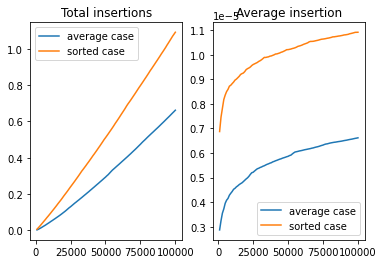

In [7]:
# generate plots for above timings

import matplotlib
from matplotlib import pyplot as plt
import numpy as np 

figure, axis = plt.subplots(1,2)

y1 = np.array (avgCaseTimes)
y2 = np.array (sortedCaseTimes)
x = np.array (transactionNumbers)

axis[0].plot(x,y1, label = "average case")
axis[0].plot(x,y2, label = "sorted case")
axis[0].set_title("Total insertions")
axis[0].legend(loc = "best")

y1 = y1/x
y2 = y2/x
axis[1].plot(x,y1, label = "average case")
axis[1].plot(x,y2, label = "sorted case")
axis[1].set_title("Average insertion")
axis[1].legend(loc = "best")
plt.show()

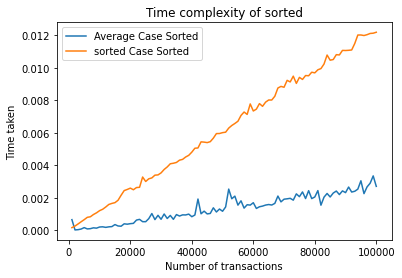

In [8]:
y1 = np.array(sortedCaseSortedTimes)
y2 = np.array(avgCaseSortedTimes)

plt.plot(x, y2, label = "Average Case Sorted")
plt.plot(x, y1, label = "sorted Case Sorted")
plt.title("Time complexity of sorted")
plt.ylabel("Time taken")
plt.xlabel("Number of transactions")
plt.legend(loc = "best")
plt.show()

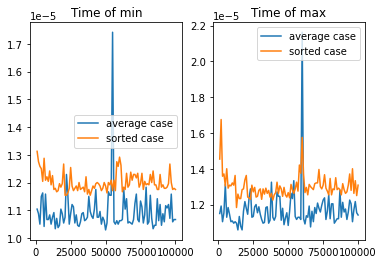

In [9]:
y2 = np.array(sortedCaseMinTimes)
y1 = np.array(avgCaseMinTimes)

figure, axis = plt.subplots(1,2)

axis[0].plot(x,y1, label = "average case")
axis[0].plot(x,y2, label = "sorted case")
axis[0].set_title("Time of min")
axis[0].legend(loc = "best")

y2 = np.array(sortedCaseMaxTimes)
y1 = np.array(avgCaseMaxTimes)

axis[1].plot(x,y1, label = "average case")
axis[1].plot(x,y2, label = "sorted case")
axis[1].set_title("Time of max")
axis[1].legend(loc = "best")
plt.show()

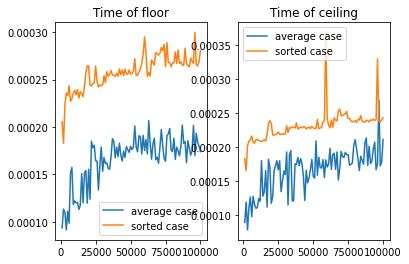

In [10]:
y2 = np.array(sortedCaseFloorTimes)
y1 = np.array(avgCaseFloorTimes)

figure, axis = plt.subplots(1,2)

axis[0].plot(x,y1, label = "average case")
axis[0].plot(x,y2, label = "sorted case")
axis[0].set_title("Time of floor")
axis[0].legend(loc = "best")

y1 = np.array(avgCaseCeilingTimes)
y2 = np.array(sortedCaseCeilingTimes)

axis[1].plot(x,y1, label = "average case")
axis[1].plot(x,y2, label = "sorted case")
axis[1].set_title("Time of ceiling")
axis[1].legend(loc = "best")
plt.show()

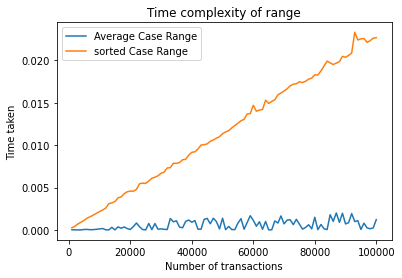

In [11]:
y1 = np.array(sortedCaseRangeTimes)
y2 = np.array(avgCaseRangeTimes)

plt.plot(x, y2, label = "Average Case Range")
plt.plot(x, y1, label = "sorted Case Range")
plt.title("Time complexity of range")
plt.ylabel("Time taken")
plt.xlabel("Number of transactions")
plt.legend(loc = "best")
plt.show()